In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('500_github.csv')

# Replace '?' with NaN
data = data.replace('?', pd.NA)
data = data.applymap(lambda x: float('nan') if pd.isna(x) else x)

print(f"Initial dataset size: {data.shape}")

# Encode 'Comment Ratio' categorical values to numeric
comment_ratio_map = {'Very Bad': 0, 'Bad': 1, 'Medium': 2, 'Good': 3}
data['Comment Ratio'] = data['Comment Ratio'].replace(comment_ratio_map)

# Handle missing values in 'Style Guide Adherence'
data['Style Guide Adherence'] = pd.to_numeric(data['Style Guide Adherence'], errors='coerce')
data['Style Guide Adherence'] = data['Style Guide Adherence'].fillna(data['Style Guide Adherence'].mean())

TARGET = 'Readability Category'
data[TARGET] = data['Readability Manual'].replace({0: 0, 1: 0, 2: 1, 3: 2, 4: 2})

numeric_features = [
    'Style Guide Adherence',
    'Variable Name Quality',
    'Complexity Score',
    'Max Line',
    'Comment Ratio',
    TARGET
]

for col in numeric_features:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.dropna(subset=numeric_features)

print(f"Dataset size after cleaning: {data.shape}")

features = [
    'Style Guide Adherence',
    'Variable Name Quality',
    'Complexity Score',
    'Max Line',
    'Comment Ratio'
]

X = data[features]
y = data[TARGET]

if len(data) > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest model (Classifier)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print("Accuracy:", accuracy)
else:
    print("The dataset is empty after cleaning.")


<ipython-input-15-1758ce4543a3>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: float('nan') if pd.isna(x) else x)
<ipython-input-15-1758ce4543a3>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Comment Ratio'] = data['Comment Ratio'].replace(comment_ratio_map)


Initial dataset size: (500, 8)
Dataset size after cleaning: (500, 9)
Accuracy: 0.47


<ipython-input-16-71402d974eee>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: float('nan') if pd.isna(x) else x)
<ipython-input-16-71402d974eee>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Comment Ratio'] = data['Comment Ratio'].replace(comment_ratio_map)


Parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2} -> Accuracy: 0.4700
Parameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 2} -> Accuracy: 0.4600
Parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 5} -> Accuracy: 0.4600
Parameters: {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 3} -> Accuracy: 0.4400
Parameters: {'n_estimators': 200, 'max_depth': 25, 'min_samples_split': 4} -> Accuracy: 0.4400


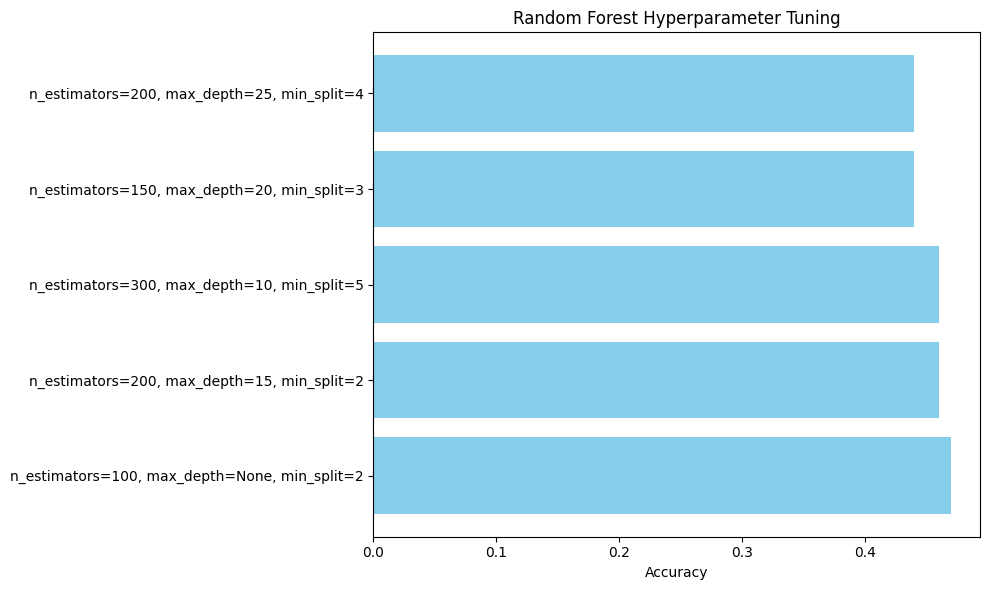

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('500_github.csv')

data = data.replace('?', pd.NA)
data = data.applymap(lambda x: float('nan') if pd.isna(x) else x)

comment_ratio_map = {'Very Bad': 0, 'Bad': 1, 'Medium': 2, 'Good': 3}
data['Comment Ratio'] = data['Comment Ratio'].replace(comment_ratio_map)

data['Style Guide Adherence'] = pd.to_numeric(data['Style Guide Adherence'], errors='coerce')
data['Style Guide Adherence'] = data['Style Guide Adherence'].fillna(data['Style Guide Adherence'].mean())

TARGET = 'Readability Category'
data[TARGET] = data['Readability Manual'].replace({0: 0, 1: 0, 2: 1, 3: 2, 4: 2})

numeric_features = [
    'Style Guide Adherence',
    'Variable Name Quality',
    'Complexity Score',
    'Max Line',
    'Comment Ratio',
    TARGET
]

for col in numeric_features:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.dropna(subset=numeric_features)

features = [
    'Style Guide Adherence',
    'Variable Name Quality',
    'Complexity Score',
    'Max Line',
    'Comment Ratio'
]

X = data[features]
y = data[TARGET]

if len(data) > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Hyperparameters
    hyperparams = [
        {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2},
        {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 2},
        {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 5},
        {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 3},
        {'n_estimators': 200, 'max_depth': 25, 'min_samples_split': 4}
    ]

    accuracies = []
    labels = []

    # Train and evaluate each hyperparameters
    for params in hyperparams:
        model = RandomForestClassifier(
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth'],
            min_samples_split=params['min_samples_split'],
            random_state=42
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        labels.append(f"n_estimators={params['n_estimators']}, max_depth={params['max_depth']}, min_split={params['min_samples_split']}")
        print(f"Parameters: {params} -> Accuracy: {accuracy:.4f}")

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.barh(labels, accuracies, color='skyblue')
    plt.xlabel('Accuracy')
    plt.title('Random Forest Hyperparameter Tuning')
    plt.tight_layout()
    plt.show()
else:
    print("The dataset is empty after cleaning.")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('code_pypi_readability_complete.csv')

data = data.replace('?', pd.NA)
data = data.applymap(lambda x: float('nan') if pd.isna(x) else x)

print(f"Initial dataset size: {data.shape}")

comment_ratio_map = {'Very Bad': 0, 'Bad': 1, 'Medium': 2, 'Good': 3}
data['Comment Ratio'] = data['Comment Ratio'].replace(comment_ratio_map)

data['Style Guide Adherence'] = pd.to_numeric(data['Style Guide Adherence'], errors='coerce')
data['Style Guide Adherence'] = data['Style Guide Adherence'].fillna(data['Style Guide Adherence'].mean())

TARGET = 'Readability Category'

numeric_features = [
    'Style Guide Adherence',
    'Variable Name Quality',
    'Complexity Score',
    'Max Line',
    'Comment Ratio',
    TARGET
]

for col in numeric_features:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.dropna(subset=numeric_features)

print(f"Dataset size after cleaning: {data.shape}")

features = [
    'Style Guide Adherence',
    'Variable Name Quality',
    'Complexity Score',
    'Max Line',
    'Comment Ratio'
]

X = data[features]
y = data[TARGET]

if len(data) > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print("Accuracy:", accuracy)
else:
    print("The dataset is empty after cleaning.")


<ipython-input-17-7ae5d1d3b737>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: float('nan') if pd.isna(x) else x)
<ipython-input-17-7ae5d1d3b737>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Comment Ratio'] = data['Comment Ratio'].replace(comment_ratio_map)


Initial dataset size: (499, 8)
Dataset size after cleaning: (499, 8)
Accuracy: 0.49


Dataset size after cleaning: (499, 8)


<ipython-input-18-d7aa870440ac>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: float('nan') if pd.isna(x) else x)
<ipython-input-18-d7aa870440ac>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Comment Ratio'] = data['Comment Ratio'].replace(comment_ratio_map)


Parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2} -> Accuracy: 0.4900
Parameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 2} -> Accuracy: 0.4900
Parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 5} -> Accuracy: 0.5100
Parameters: {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 3} -> Accuracy: 0.4800
Parameters: {'n_estimators': 200, 'max_depth': 25, 'min_samples_split': 4} -> Accuracy: 0.5000


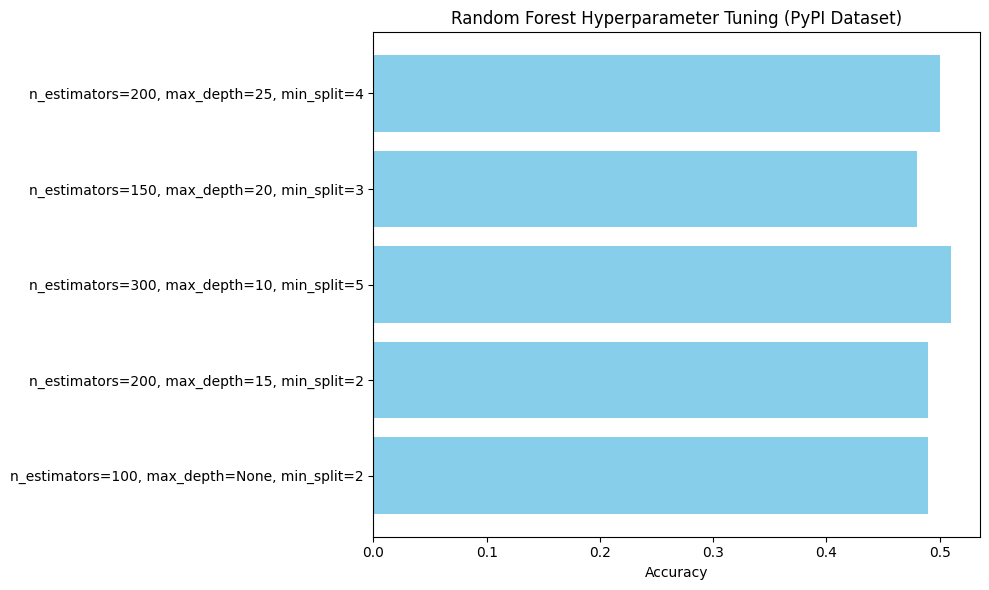

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('code_pypi_readability_complete.csv')

data = data.replace('?', pd.NA)
data = data.applymap(lambda x: float('nan') if pd.isna(x) else x)

comment_ratio_map = {'Very Bad': 0, 'Bad': 1, 'Medium': 2, 'Good': 3}
data['Comment Ratio'] = data['Comment Ratio'].replace(comment_ratio_map)

data['Style Guide Adherence'] = pd.to_numeric(data['Style Guide Adherence'], errors='coerce')
data['Style Guide Adherence'] = data['Style Guide Adherence'].fillna(data['Style Guide Adherence'].mean())

TARGET = 'Readability Category'

numeric_features = [
    'Style Guide Adherence',
    'Variable Name Quality',
    'Complexity Score',
    'Max Line',
    'Comment Ratio',
    TARGET
]

for col in numeric_features:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.dropna(subset=numeric_features)

print(f"Dataset size after cleaning: {data.shape}")

features = [
    'Style Guide Adherence',
    'Variable Name Quality',
    'Complexity Score',
    'Max Line',
    'Comment Ratio'
]

X = data[features]
y = data[TARGET]

if len(data) > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    hyperparams = [
        {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2},
        {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 2},
        {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 5},
        {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 3},
        {'n_estimators': 200, 'max_depth': 25, 'min_samples_split': 4}
    ]

    accuracies = []
    labels = []

    for params in hyperparams:
        model = RandomForestClassifier(
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth'],
            min_samples_split=params['min_samples_split'],
            random_state=42
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        labels.append(f"n_estimators={params['n_estimators']}, max_depth={params['max_depth']}, min_split={params['min_samples_split']}")
        print(f"Parameters: {params} -> Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(10, 6))
    plt.barh(labels, accuracies, color='skyblue')
    plt.xlabel('Accuracy')
    plt.title('Random Forest Hyperparameter Tuning (PyPI Dataset)')
    plt.tight_layout()
    plt.show()
else:
    print("The dataset is empty after cleaning.")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('total.csv')

data = data.replace('?', pd.NA)
data = data.applymap(lambda x: float('nan') if pd.isna(x) else x)

print(f"Initial dataset size: {data.shape}")

comment_ratio_map = {'Very Bad': 0, 'Bad': 1, 'Medium': 2, 'Good': 3}
data['Comment Ratio'] = data['Comment Ratio'].replace(comment_ratio_map)

data['Style Guide Adherence'] = pd.to_numeric(data['Style Guide Adherence'], errors='coerce')
data['Style Guide Adherence'] = data['Style Guide Adherence'].fillna(data['Style Guide Adherence'].mean())

TARGET = 'Readability Category'
data[TARGET] = data['Readability Manual'].replace({0: 0, 1: 0, 2: 1, 3: 2, 4: 2})

numeric_features = [
    'Style Guide Adherence',
    'Variable Name Quality',
    'Complexity Score',
    'Max Line',
    'Comment Ratio',
    TARGET
]

for col in numeric_features:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.dropna(subset=numeric_features)

print(f"Dataset size after cleaning: {data.shape}")

features = [
    'Style Guide Adherence',
    'Variable Name Quality',
    'Complexity Score',
    'Max Line',
    'Comment Ratio'
]

X = data[features]
y = data[TARGET]

if len(data) > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print("Accuracy:", accuracy)
else:
    print("The dataset is empty after cleaning.")


<ipython-input-19-73d2da21a6a0>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: float('nan') if pd.isna(x) else x)
<ipython-input-19-73d2da21a6a0>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Comment Ratio'] = data['Comment Ratio'].replace(comment_ratio_map)


Initial dataset size: (999, 8)
Dataset size after cleaning: (999, 9)
Accuracy: 0.505


<ipython-input-20-0eed71de6930>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: float('nan') if pd.isna(x) else x)
<ipython-input-20-0eed71de6930>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Comment Ratio'] = data['Comment Ratio'].replace(comment_ratio_map)


Parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2} -> Accuracy: 0.5050
Parameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 2} -> Accuracy: 0.5200
Parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 5} -> Accuracy: 0.5150
Parameters: {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 3} -> Accuracy: 0.5200
Parameters: {'n_estimators': 200, 'max_depth': 25, 'min_samples_split': 4} -> Accuracy: 0.5050


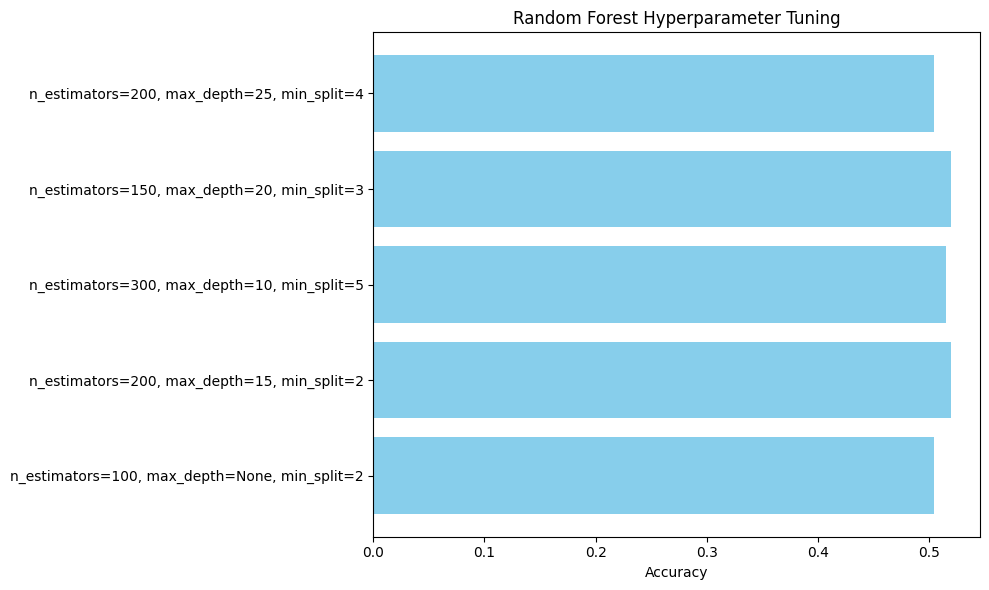

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('total.csv')

data = data.replace('?', pd.NA)
data = data.applymap(lambda x: float('nan') if pd.isna(x) else x)

comment_ratio_map = {'Very Bad': 0, 'Bad': 1, 'Medium': 2, 'Good': 3}
data['Comment Ratio'] = data['Comment Ratio'].replace(comment_ratio_map)

data['Style Guide Adherence'] = pd.to_numeric(data['Style Guide Adherence'], errors='coerce')
data['Style Guide Adherence'] = data['Style Guide Adherence'].fillna(data['Style Guide Adherence'].mean())

TARGET = 'Readability Category'
data[TARGET] = data['Readability Manual'].replace({0: 0, 1: 0, 2: 1, 3: 2, 4: 2})

numeric_features = [
    'Style Guide Adherence',
    'Variable Name Quality',
    'Complexity Score',
    'Max Line',
    'Comment Ratio',
    TARGET
]

for col in numeric_features:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.dropna(subset=numeric_features)

features = [
    'Style Guide Adherence',
    'Variable Name Quality',
    'Complexity Score',
    'Max Line',
    'Comment Ratio'
]

X = data[features]
y = data[TARGET]

if len(data) > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    hyperparams = [
        {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2},
        {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 2},
        {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 5},
        {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 3},
        {'n_estimators': 200, 'max_depth': 25, 'min_samples_split': 4}
    ]

    accuracies = []
    labels = []

    for params in hyperparams:
        model = RandomForestClassifier(
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth'],
            min_samples_split=params['min_samples_split'],
            random_state=42
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        labels.append(f"n_estimators={params['n_estimators']}, max_depth={params['max_depth']}, min_split={params['min_samples_split']}")
        print(f"Parameters: {params} -> Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(10, 6))
    plt.barh(labels, accuracies, color='skyblue')
    plt.xlabel('Accuracy')
    plt.title('Random Forest Hyperparameter Tuning')
    plt.tight_layout()
    plt.show()
else:
    print("The dataset is empty after cleaning.")

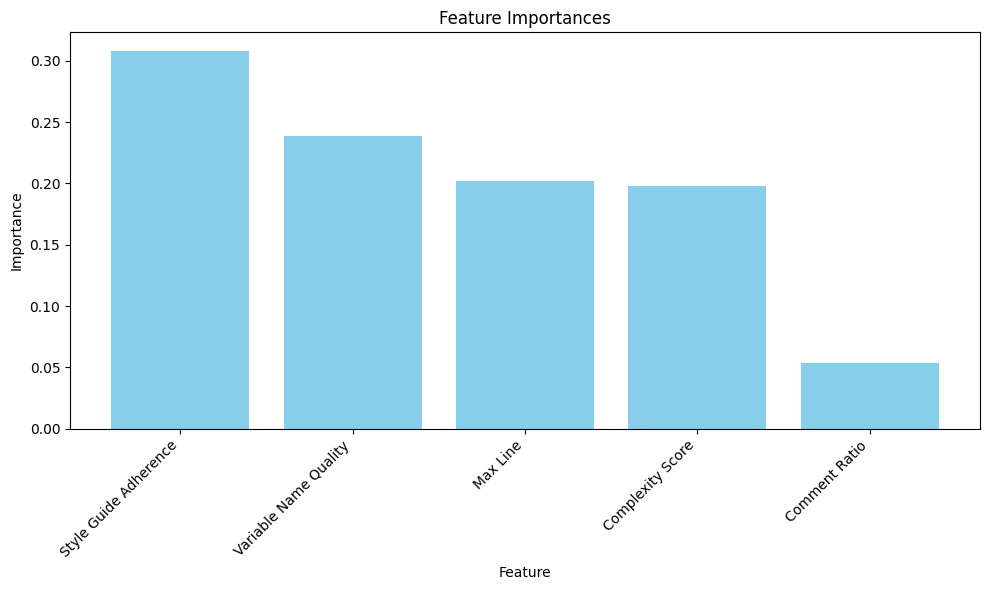

Feature: Style Guide Adherence, Importance: 0.3078
Feature: Variable Name Quality, Importance: 0.2389
Feature: Complexity Score, Importance: 0.1982
Feature: Max Line, Importance: 0.2018
Feature: Comment Ratio, Importance: 0.0533


In [22]:
import numpy as np

best_params = {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 2}
model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

def plot_feature_importance(importances, feature_names):
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_names)), importances[indices], align='center', color='skyblue')
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45, ha='right')
    plt.title('Feature Importances')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()

plot_feature_importance(feature_importances, features)

for feature, importance in zip(features, feature_importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")